In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
#import pymc3 as pm
from scipy import stats
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms
import math
import statsmodels.api as smv
%matplotlib inline

In [282]:
latch1_s = pd.read_csv('spice_latch2_noise_single_120.dat')
latch2_s = pd.read_csv('spice_latch1_noise_single_120.dat')
latch1_s.columns = ['time', 'voltage']
latch2_s.columns = ['time', 'voltage']

latch1_m=pd.read_csv('spice_noise_latch_1_multi.dat')
latch2_m=pd.read_csv('spice_noise_latch_2_multi.dat')

latch1_m.columns = ['time', 'voltage']
latch2_m.columns = ['time', 'voltage']

TTE_m = pd.read_csv('file.csv')
TTE_m.columns = ['170mv','160mv', '150mv', '140mv', '130mv', '120mv', '110mv', '100mv','90mv', '80mv', '70mv', '60mv', '50mv', '40mv', '30mv', '20mv','10mv','0mv']
#TTE_m.describe()


Exit_m = pd.read_csv('Exit_m_0mv_V180_T100.csv')
Exit_m.columns = ['170mv','160mv', '150mv', '140mv', '130mv', '120mv', '110mv', '100mv','90mv', '80mv', '70mv', '60mv', '50mv', '40mv', '30mv', '20mv','10mv','0mv']


Period_m = pd.read_csv('Period_m_0mv_V180_T100.csv')
Period_m.columns = ['170mv','160mv', '150mv', '140mv', '130mv', '120mv', '110mv', '100mv','90mv', '80mv', '70mv', '60mv', '50mv', '40mv', '30mv', '20mv','10mv','0mv']
#Period_m.describe()


tID_m = pd.read_csv('t_Id_m_0mv_V180_T100.csv')
tID_m.columns = ['170mv','160mv', '150mv', '140mv', '130mv', '120mv', '110mv', '100mv','90mv', '80mv', '70mv', '60mv', '50mv', '40mv', '30mv', '20mv','10mv','0mv']
#tID_m.describe()


Runtime_m = pd.read_csv('Runtime_m_0mv_V180_T100.csv')
Runtime_m.columns = ['second']
Runtime_m.head()

print(latch1_s.describe(),"First inverter")
print(latch2_s.describe(),"Second inverter")


               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.000248
std    2.886600e-08       0.011879
min    5.000000e-13      -0.054794
25%    2.499900e-08      -0.007857
50%    4.999750e-08       0.000085
75%    7.499600e-08       0.008389
max    9.999450e-08       0.051493 First inverter
               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.180658
std    2.886600e-08       0.011877
min    5.000000e-13       0.128437
25%    2.499900e-08       0.172632
50%    4.999750e-08       0.180560
75%    7.499600e-08       0.188487
max    9.999450e-08       0.236275 Second inverter


               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.000248
std    2.886600e-08       0.011879
min    5.000000e-13      -0.054794
25%    2.499900e-08      -0.007857
50%    4.999750e-08       0.000085
75%    7.499600e-08       0.008389
max    9.999450e-08       0.051493 First inverter
               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.180658
std    2.886600e-08       0.011877
min    5.000000e-13       0.128437
25%    2.499900e-08       0.172632
50%    4.999750e-08       0.180560
75%    7.499600e-08       0.188487
max    9.999450e-08       0.236275 Second inverter


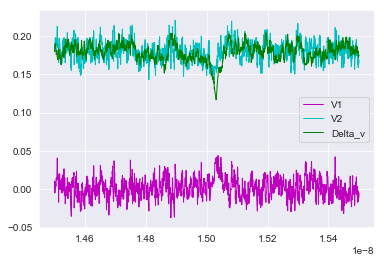

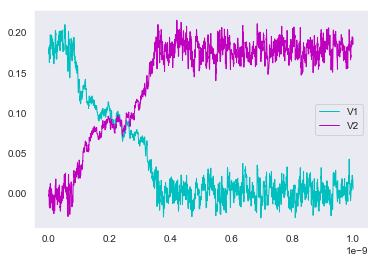

In [294]:
#plt.plot(data_1["time"], data_1["voltage"],'r-',data_2["time"], data_2["voltage"],'b-')
plt.figure(0)
plt.grid()
plt.plot(latch1_s["time"][29000:31000],latch1_s["voltage"][29000:31000],'m-', label='V1', linewidth=1)
plt.plot(latch2_s["time"][29000:31000],latch2_s["voltage"][29000:31000],'c-', label='V2', linewidth=1)
plt.plot(latch2_s["time"][29000:31000],latch2_s["voltage"][29000:31000]-latch1_s["voltage"][29000:31000],'g-', label='Delta_v', linewidth=1)
plt.grid(True)
plt.legend()


plt.figure(1)
plt.plot(latch1_m["time"][0:2000],latch1_m["voltage"][0:2000],'c-', label='V1', linewidth=1)
plt.plot(latch2_m["time"][0:2000],latch2_m["voltage"][0:2000],'m-', label='V2', linewidth=1)
plt.grid(True, lw = 2, ls = '--', c = '.75')
plt.legend()
plt.grid()
#plt.savefig('Voltages_1.png')


               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.000248
std    2.886600e-08       0.011879
min    5.000000e-13      -0.054794
25%    2.499900e-08      -0.007857
50%    4.999750e-08       0.000085
75%    7.499600e-08       0.008389
max    9.999450e-08       0.051493 First inverter
               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.180658
std    2.886600e-08       0.011877
min    5.000000e-13       0.128437
25%    2.499900e-08       0.172632
50%    4.999750e-08       0.180560
75%    7.499600e-08       0.188487
max    9.999450e-08       0.236275 Second inverter


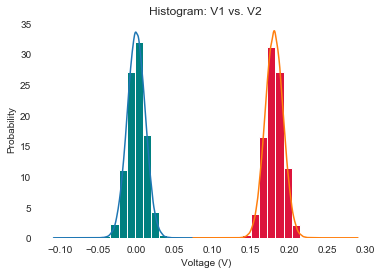

In [300]:
fig, ax = plt.subplots()
latch1_s["voltage"].plot.kde(ax=ax, legend=False, title='Histogram: V1 vs. V2')
latch1_s["voltage"].plot.hist(density=True,color='teal', ax=ax)
latch2_s["voltage"].plot.kde(ax=ax, legend=False, title='Histogram: V1 vs. V2')
latch2_s["voltage"].plot.hist(density=True,  color='crimson', ax=ax)
ax.set_ylabel('Probability')
ax.set_xlabel('Voltage (V)')
ax.grid(axis='y')
ax.set_facecolor('white')

print(latch1_s.describe(),"First inverter")
print(latch2_s.describe(),"Second inverter")


0.0002479940066289773 0.011878868983643166
0.1806581571435868 0.011877048845610342
               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.000248
std    2.886600e-08       0.011879
min    5.000000e-13      -0.054794
25%    2.499900e-08      -0.007857
50%    4.999750e-08       0.000085
75%    7.499600e-08       0.008389
max    9.999450e-08       0.051493 First inverter
               time        voltage
count  1.999890e+05  199989.000000
mean   4.999750e-08       0.180658
std    2.886600e-08       0.011877
min    5.000000e-13       0.128437
25%    2.499900e-08       0.172632
50%    4.999750e-08       0.180560
75%    7.499600e-08       0.188487
max    9.999450e-08       0.236275 Second inverter


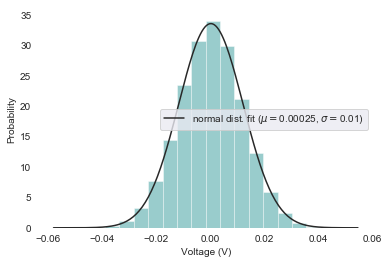

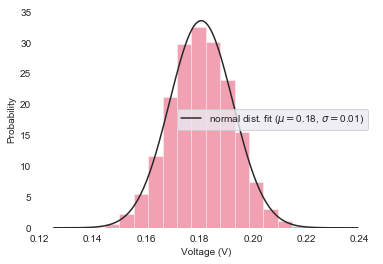

In [434]:
from scipy.stats import norm


fig, ax = plt.subplots()
ax = sns.distplot(latch1_s["voltage"],color='teal',fit=norm, kde=False,bins=20)

(mu, sigma) = stats.norm.fit(latch1_s["voltage"])
print (mu,sigma)

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
sns.set_style('darkgrid')
ax.set_ylabel('Probability')
ax.set_xlabel('Voltage (V)')
ax.grid(axis='y')
ax.set_facecolor('white')

fig, ax = plt.subplots()
ax = sns.distplot(latch2_s["voltage"],color="crimson", fit=norm, kde=False, bins=20)
(mu, sigma) = stats.norm.fit(latch2_s["voltage"])
print (mu,sigma)

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
sns.set_style('darkgrid')
ax.set_ylabel('Probability')
ax.set_xlabel('Voltage (V)')
ax.grid(axis='y')
ax.set_facecolor('white')

print(latch1_s.describe(),"First inverter")
print(latch2_s.describe(),"Second inverter")

In [15]:
Exit_m["170mv"].describe()

count    999.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: 170mv, dtype: float64

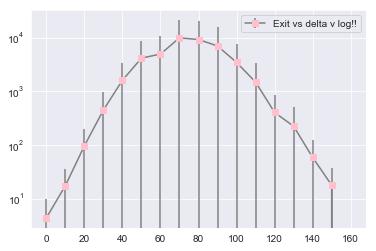

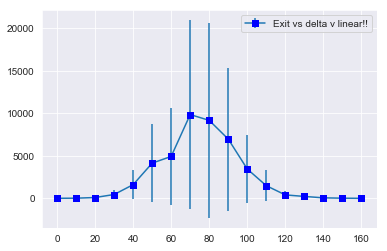

In [386]:
Exit_m_Mat=np.asarray([Exit_m["0mv"],Exit_m["10mv"],Exit_m["20mv"],Exit_m["30mv"],Exit_m["40mv"],Exit_m["50mv"],Exit_m["60mv"],Exit_m["70mv"],Exit_m["80mv"],Exit_m["90mv"],Exit_m["100mv"],Exit_m["110mv"],Exit_m["120mv"],Exit_m["130mv"],Exit_m["140mv"],Exit_m["150mv"],Exit_m["160mv"]])
Exit_m_Mat.shape
stdExit_rig=np.std(Exit_m_Mat,axis=1)
meanExit_rig=np.mean(Exit_m_Mat,axis=1)


plt.figure()
x=list(range(0 ,170 ,10))
plt.errorbar(x,meanExit_rig, stdExit_rig,marker='s',label='Exit vs delta v log!!', mfc='pink',color='gray',
         mec='pink', ms=5, mew=2)
plt.yscale('log')
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.show()


plt.figure()
x=list(range(0 ,170 ,10))
plt.errorbar(x,meanExit_rig, stdExit_rig,marker='s',label='Exit vs delta v linear!!', mfc='blue',
         mec='blue', ms=5, mew=2)
#plt.yscale('log')
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.show()



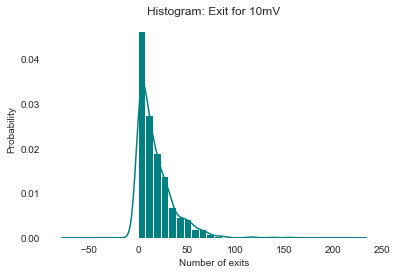

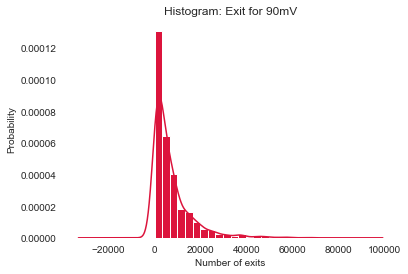

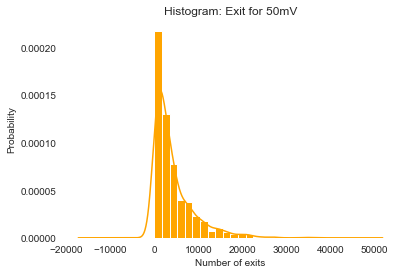

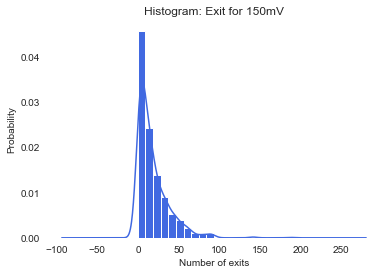

In [439]:
fig, ax = plt.subplots()
Exit_m["10mv"].plot.kde(ax=ax, legend=False,color='teal', title='Histogram: Exit for 10mV')
Exit_m["10mv"].plot.hist(density=True,color='teal',bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')
fig, ax = plt.subplots()
Exit_m["90mv"].plot.kde(ax=ax, legend=False, color='crimson',title='Histogram: Exit for 90mV')
Exit_m["90mv"].plot.hist(density=True,  color='crimson',bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')

fig, ax = plt.subplots()
Exit_m["50mv"].plot.kde(ax=ax, legend=False, color='orange', title='Histogram: Exit for 50mV')
Exit_m["50mv"].plot.hist(density=True,  color='orange',bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')


fig, ax = plt.subplots()
Exit_m["150mv"].plot.kde(ax=ax, legend=False, color='royalblue', title='Histogram: Exit for 150mV')
Exit_m["150mv"].plot.hist(density=True,  color='royalblue',bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')






Text(0.5, 1.0, 'Exit for 150mV')

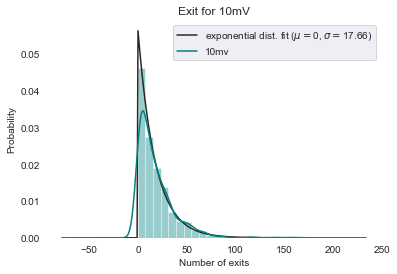

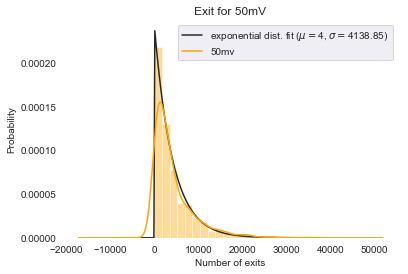

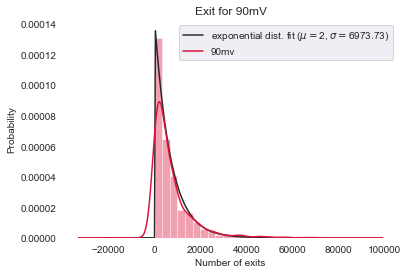

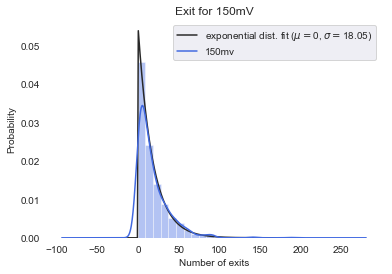

In [440]:
from scipy.stats import expon


fig, ax = plt.subplots()
ax = sns.distplot(Exit_m["10mv"],color='teal',fit=stats.expon, kde=False,bins=20)
(mu, sigma) = stats.expon.fit(Exit_m["10mv"])
plt.legend(["exponential dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
Exit_m["10mv"].plot.kde(ax=ax, legend=True, color='teal', title='Histogram: Exit for 10mV')
sns.set_style('darkgrid')
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')
plt.title('Exit for 10mV')

fig, ax = plt.subplots()
ax = sns.distplot(Exit_m["50mv"],color='orange', fit=stats.expon, kde=False, bins=20)
(mu, sigma) = stats.expon.fit(Exit_m["50mv"])
plt.legend(["exponential dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
Exit_m["50mv"].plot.kde(ax=ax, legend=True, color='orange', title='Histogram: Exit for 50mV')
sns.set_style('darkgrid')
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')
plt.title('Exit for 50mV')


fig, ax = plt.subplots()
ax = sns.distplot(Exit_m["90mv"],color="crimson", fit=stats.expon, kde=False, bins=20)
(mu, sigma) = stats.expon.fit(Exit_m["90mv"])
plt.legend(["exponential dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
Exit_m["90mv"].plot.kde(ax=ax, legend=True, color='crimson',title='Histogram: Exit for 90mV')
sns.set_style('darkgrid')
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')
plt.title('Exit for 90mV')

fig, ax = plt.subplots()
ax = sns.distplot(Exit_m["150mv"],color="royalblue", fit=stats.expon, kde=False, bins=20)
(mu, sigma) = stats.expon.fit(Exit_m["150mv"])
plt.legend(["exponential dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
Exit_m["150mv"].plot.kde(ax=ax, legend=True, color='royalblue', title='Histogram: Exit for 150mV')
sns.set_style('darkgrid')
ax.set_ylabel('Probability')
ax.set_xlabel('Number of exits')
ax.grid(axis='y')
ax.set_facecolor('white')
plt.title('Exit for 150mV')



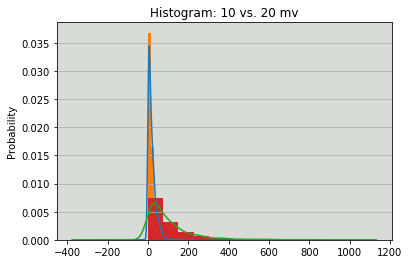

In [16]:
fig, ax = plt.subplots()
Exit_m["10mv"].plot.kde(ax=ax, legend=False, title='Histogram: 10 vs. 20 mv')
Exit_m["10mv"].plot.hist(density=True, ax=ax)
Exit_m["20mv"].plot.kde(ax=ax, legend=False, title='Histogram: 10 vs. 20 mv')
Exit_m["20mv"].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

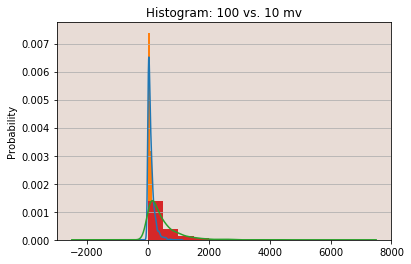

In [26]:
fig, ax = plt.subplots()
Exit_m["20mv"].plot.kde(ax=ax, legend=False, title='Histogram: 100 vs. 10 mv')
Exit_m["20mv"].plot.hist(density=True, ax=ax)
Exit_m["30mv"].plot.kde(ax=ax, legend=False, title='Histogram: 100 vs. 10 mv')
Exit_m["30mv"].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#e8dcd6')

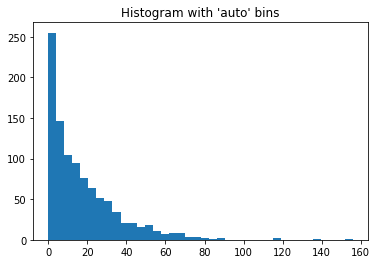

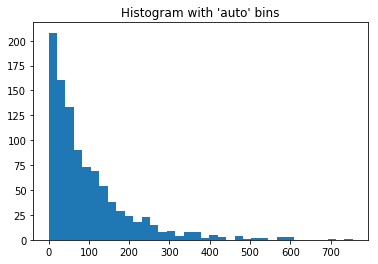

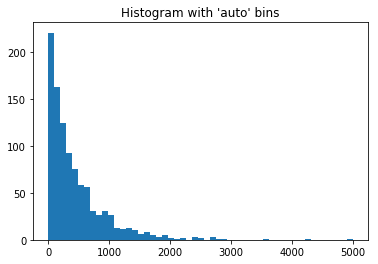

In [27]:
plt.hist(Exit_m["10mv"], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram Exit 10mv")
plt.show()

plt.hist(Exit_m["20mv"], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram Exit 20mv")
plt.show()

plt.hist(Exit_m["30mv"], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram Exit 30mv")
plt.show()

Text(0.5, 1.0, 'single latch')

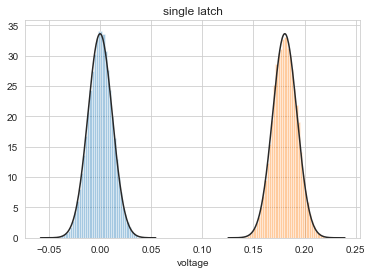

In [33]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.distplot(latch1_s["voltage"],fit=stats.norm, kde=False)
sns.distplot(latch2_s["voltage"],fit=stats.norm, kde=False)
plt.title("single latch")

Text(0.5, 1.0, 'Exit 30,20,10')

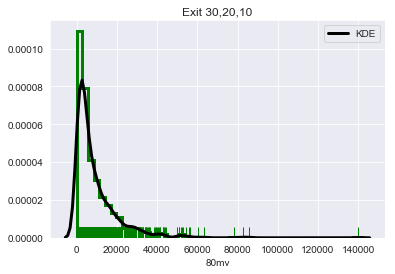

In [43]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.distplot(Exit_m["80mv"],rug=True, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
#sns.distplot(Exit_m["70mv"],fit=stats.gamma, kde=False)
#sns.distplot(Exit_m["10mv"],fit=stats.norm, kde=False)
plt.title("Exit 30,20,10")

In [103]:
type(TTE_m["80mv"])

pandas.core.series.Series

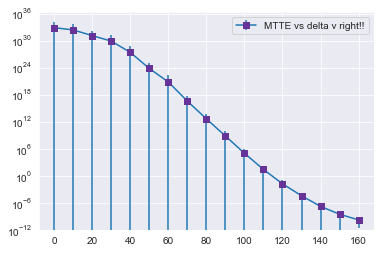

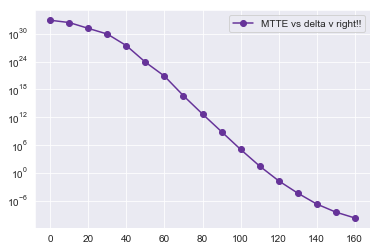

In [251]:
TTE_new.describe()
#semilogy

TTE_new_Mat=np.asarray([TTE_new["0mv"],TTE_new["10mv"],TTE_new["20mv"],TTE_new["30mv"],TTE_new["40mv"],TTE_new["50mv"],TTE_new["60mv"],TTE_new["70mv"],TTE_new["80mv"],TTE_new["90mv"],TTE_new["100mv"],TTE_new["110mv"],TTE_new["120mv"],TTE_new["130mv"],TTE_new["140mv"],TTE_m["150mv"],TTE_new["160mv"]])
TTE_new_Mat.shape
stdTTE_rig=np.std(TTE_new_Mat,axis=1)
meanTTE_rig=np.mean(TTE_new_Mat,axis=1)


plt.figure()
x=list(range(0 ,170 ,10))
plt.errorbar(x,meanTTE_rig, stdTTE_rig,marker='s',label='MTTE vs delta v right!!', mfc='rebeccapurple',
         mec='rebeccapurple', ms=5, jmew=2)
plt.yscale('log')
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.show()




plt.figure()
x=list(range(0 ,170 ,10))
plt.semilogy(x,meanTTE_rig,'-o',label='MTTE vs delta v right!!', color='rebeccapurple')

#plt.yscale('log', nonposy='clip')
plt.legend()
plt.show()

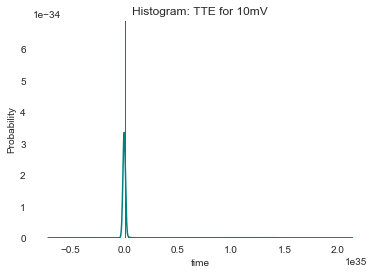

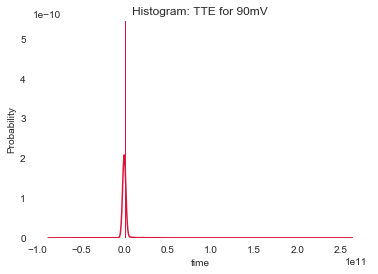

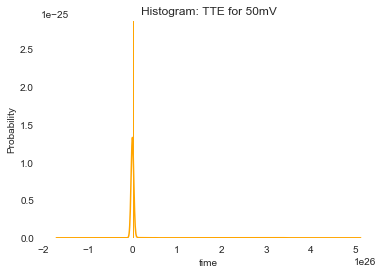

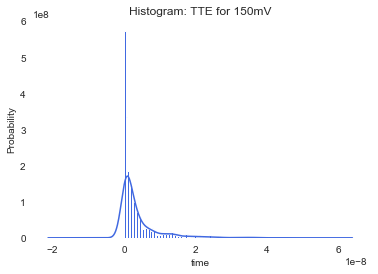

In [420]:
fig, ax = plt.subplots()
TTE_m["10mv"].plot.kde(ax=ax, legend=False,color='teal', title='Histogram: TTE for 10mV')
TTE_m["10mv"].plot.hist(density=True,color='teal',bins=100)
ax.set_ylabel('Probability')
ax.set_xlabel('time')
ax.grid(axis='y')
ax.set_facecolor('white')
fig, ax = plt.subplots()
TTE_m["90mv"].plot.kde(ax=ax, legend=False, color='crimson',title='Histogram: TTE for 90mV')
TTE_m["90mv"].plot.hist(density=True,  color='crimson',bins=100)
ax.set_ylabel('Probability')
ax.set_xlabel('time')
ax.grid(axis='y')
ax.set_facecolor('white')

fig, ax = plt.subplots()
TTE_m["50mv"].plot.kde(ax=ax, legend=False, color='orange', title='Histogram: TTE for 50mV')
TTE_m["50mv"].plot.hist(density=True,  color='orange',bins=100)
ax.set_ylabel('Probability')
ax.set_xlabel('time')
ax.grid(axis='y')
ax.set_facecolor('white')


fig, ax = plt.subplots()
TTE_m["150mv"].plot.kde(ax=ax, legend=False, color='royalblue', title='Histogram: TTE for 150mV')
TTE_m["150mv"].plot.hist(density=True,  color='royalblue',bins=100)
ax.set_ylabel('Probability')
ax.set_xlabel('time')
ax.grid(axis='y')
ax.set_facecolor('white')




In [403]:
TTE_m.head()
TTE_log=TTE_m
def log_func(adad):
    return math.log10(adad)
TTE_log['log160'] = TTE_m["160mv"].apply(log_func)
TTE_log['log150'] = TTE_m["150mv"].apply(log_func)
TTE_log['log140'] = TTE_m["140mv"].apply(log_func)
TTE_log['log130'] = TTE_m["130mv"].apply(log_func)
TTE_log['log120'] = TTE_m["120mv"].apply(log_func)
TTE_log['log110'] = TTE_m["110mv"].apply(log_func)
TTE_log['log100'] = TTE_m["100mv"].apply(log_func)
TTE_log['log90'] = TTE_m["90mv"].apply(log_func)
TTE_log['log80'] = TTE_m["80mv"].apply(log_func)
TTE_log['log70'] = TTE_m["70mv"].apply(log_func)
TTE_log['log60'] = TTE_m["60mv"].apply(log_func)
TTE_log['log50'] = TTE_m["50mv"].apply(log_func)
TTE_log['log40'] = TTE_m["40mv"].apply(log_func)
TTE_log['log30'] = TTE_m["30mv"].apply(log_func)
TTE_log['log20'] = TTE_m["20mv"].apply(log_func)
TTE_log['log10'] = TTE_m["10mv"].apply(log_func)
TTE_log['log0'] = TTE_m["0mv"].apply(log_func)
TTE_log.head()

,170mv,160mv,150mv,140mv,130mv,120mv,110mv,100mv,90mv,80mv,...,log90,log80,log70,log60,log50,log40,log30,log20,log10,log0
0,1.700000e-11,2.700000e-10,2.106100e-08,2.864400e-06,7.504600e-04,1.137700,3190.100000,1.230700e+07,1.007200e+11,9.932400e+14,...,11.003116,14.997054,18.002684,20.762333,24.672855,27.812733,28.657830,30.413702,30.413702,31.112672
1,3.500000e-12,1.400000e-10,2.943000e-09,1.177500e-08,4.486300e-06,0.002122,2.612200,5.284500e+03,1.612400e+08,4.506600e+11,...,8.207473,11.653849,15.476933,19.529674,23.414522,25.563742,28.152564,30.263162,31.740284,31.740284
2,5.500000e-12,2.660000e-10,5.365000e-10,1.502600e-08,4.117300e-06,0.000045,0.019203,2.362000e+01,4.726800e+05,5.095400e+08,...,5.674567,8.707178,12.679891,16.973677,19.814407,23.081815,25.026288,27.156640,28.235806,29.190051
3,4.450000e-11,1.070000e-10,2.310000e-10,5.086500e-09,7.985900e-07,0.000004,0.000395,3.555300e+00,2.761400e+04,2.053400e+08,...,4.441129,8.312474,12.296731,15.232234,18.865098,21.368882,24.651511,26.399691,28.089905,28.992986
4,3.450000e-11,1.795000e-10,7.183500e-09,4.238300e-07,1.186700e-05,0.000938,0.970320,5.501700e+02,1.365000e+06,1.401700e+10,...,6.135133,10.146655,14.086680,17.846343,21.265973,23.832994,26.378307,28.521308,29.123362,29.822345


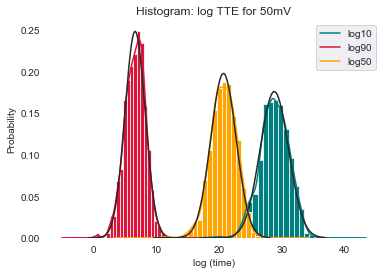

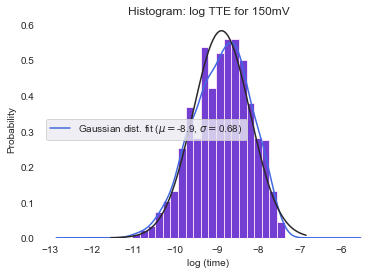

In [442]:
fig, ax = plt.subplots()
TTE_log["log10"].plot.kde(ax=ax, legend=True,color='teal', title='Histogram: log TTE for 10mV')
TTE_log["log10"].plot.hist(density=True,color='teal',bins=20)
ax = sns.distplot(TTE_log["log10"],color='teal', fit=norm, kde=False, bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('log (time)')
ax.grid(axis='y')
ax.set_facecolor('white')

TTE_log["log90"].plot.kde(ax=ax, legend=True, color='crimson',title='Histogram: log TTE for 90mV')
TTE_log["log90"].plot.hist(density=True,  color='crimson',bins=20)
ax = sns.distplot(TTE_log["log90"],color='crimson', fit=norm, kde=False, bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('log (time)')
ax.grid(axis='y')
ax.set_facecolor('white')

TTE_log["log50"].plot.kde(ax=ax, legend=True, color='orange', title='Histogram: log TTE for 50mV')
TTE_log["log50"].plot.hist(density=True,  color='orange',bins=20)
ax = sns.distplot(TTE_log["log50"],color='orange', fit=norm, kde=False, bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('log (time)')
ax.grid(axis='y')
ax.set_facecolor('white')

fig, ax = plt.subplots()

TTE_log["log150"].plot.kde(ax=ax, legend=True, color='royalblue', title='Histogram: log TTE for 150mV')
TTE_log["log150"].plot.hist(density=True,  color='royalblue',bins=20)
ax = sns.distplot(TTE_log["log150"],color='m', fit=norm, kde=False, bins=20)
(mu, sigma) = stats.norm.fit(TTE_log["log150"])
plt.legend(["Gaussian dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
ax.set_ylabel('Probability')
ax.set_xlabel('log (time)')
ax.grid(axis='y')
ax.set_facecolor('white')

Text(0.5, 1.0, 'log TTE')

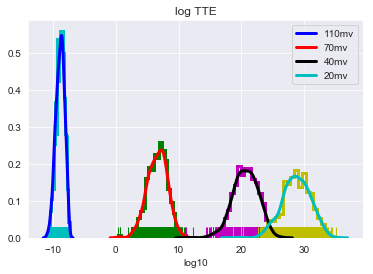

In [411]:
#hh=math.log10(TTE_m["80mv"])


fig, ax = plt.subplots()
sns.set_style('darkgrid')


sns.distplot(TTE_log["log150"],rug=True, rug_kws={"color": "c"}, kde_kws={"color": "b", "lw": 3, "label": "110mv"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "c"})
#sns.distplot(Exit_m["70mv"],fit=stats.gamma, kde=False)

sns.distplot(TTE_log["log90"],rug=True, rug_kws={"color": "g"}, kde_kws={"color": "r", "lw": 3, "label": "70mv"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
#sns.distplot(Exit_m["70mv"],fit=stats.gamma, kde=False)
#sns.distplot(Exit_m["10mv"],fit=stats.norm, kde=False)
sns.distplot(TTE_log["log50"],rug=True, rug_kws={"color": "m"}, kde_kws={"color": "k", "lw": 3, "label": "40mv"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "m"})

sns.distplot(TTE_log["log10"],rug=True, rug_kws={"color": "y"}, kde_kws={"color": "c", "lw": 3, "label": "20mv"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "y"})
#sns.distplot(Exit_m["70mv"],fit=stats.gamma, kde=False)
plt.title("log TTE")





In [421]:
def log_func(adad):
    return math.log10(adad)



from scipy import stats


TTE_new = pd.read_csv('file.csv')

TTE_new.columns = ['170mv','160mv', '150mv', '140mv', '130mv', '120mv', '110mv', '100mv','90mv', '80mv', '70mv', '60mv', '50mv', '40mv', '30mv', '20mv','10mv','0mv']
#TTE_m.describe()
TTE_new.describe()
hhh=np.asarray([TTE_new["0mv"].apply(log_func),TTE_new["10mv"].apply(log_func)])
TTE_log_new=np.asarray([TTE_new["0mv"].apply(log_func),TTE_new["10mv"].apply(log_func),TTE_new["20mv"].apply(log_func),TTE_new["30mv"].apply(log_func),TTE_new["40mv"].apply(log_func),TTE_new["50mv"].apply(log_func),TTE_new["60mv"].apply(log_func),TTE_new["70mv"].apply(log_func),TTE_new["80mv"].apply(log_func),TTE_new["90mv"].apply(log_func),TTE_new["100mv"].apply(log_func),TTE_new["110mv"].apply(log_func),TTE_new["120mv"].apply(log_func),TTE_new["130mv"].apply(log_func),TTE_new["140mv"].apply(log_func),TTE_m["150mv"].apply(log_func),TTE_new["160mv"].apply(log_func)])
TTE_log_new.shape

(17, 999)

In [422]:
a=[[1,2,3],[4,4,4]]
np.std(a, axis=1)
stdTTE=np.std(TTE_log_new,axis=1)
meanTTE=np.mean(TTE_log_new,axis=1)
meanTTE.shape

(17,)

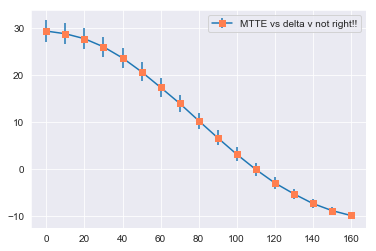

In [236]:
plt.figure()
x=list(range(0 ,170 ,10))
plt.errorbar(x, meanTTE, stdTTE,marker='s',label='MTTE vs delta v not right!!', mfc='coral',
         mec='coral', ms=5, mew=2)
plt.legend()
plt.show()

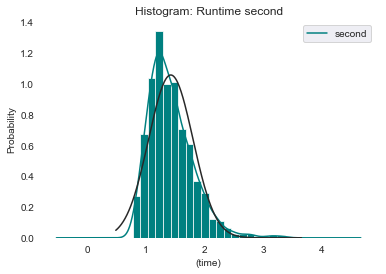

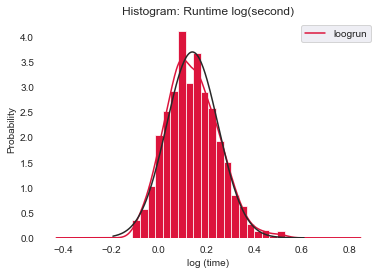

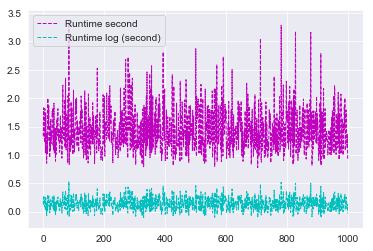

In [429]:
Runtime_m['loogrun'] = Runtime_m['second'].apply(log_func)

fig, ax = plt.subplots()
Runtime_m['second'].plot.kde(ax=ax, legend=True,color='teal', title='Histogram: Runtime second')
Runtime_m['second'].plot.hist(density=True,color='teal',bins=20)
ax = sns.distplot(Runtime_m['second'],color='teal', fit=norm, kde=False, bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('(time)')
ax.grid(axis='y')
ax.set_facecolor('white')

fig, ax = plt.subplots()
Runtime_m['loogrun'].plot.kde(ax=ax, legend=True, color='crimson',title='Histogram: Runtime log(second)')
Runtime_m['loogrun'].plot.hist(density=True,  color='crimson',bins=20)
ax = sns.distplot(Runtime_m['loogrun'],color='crimson', fit=norm, kde=False, bins=20)
ax.set_ylabel('Probability')
ax.set_xlabel('log (time)')
ax.grid(axis='y')
ax.set_facecolor('white')







plt.figure()
plt.plot(Runtime_m['second'],'m--', label='Runtime second', linewidth=1)
plt.plot(Runtime_m['loogrun'],'c--', label='Runtime log (second)', linewidth=1)
plt.legend()


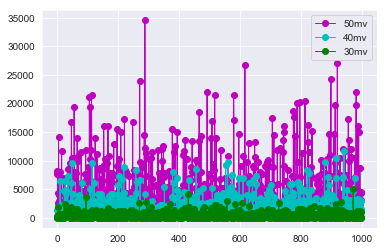

In [59]:
plt.figure()
plt.plot(Exit_m["50mv"],'m-o', label='50mv', linewidth=1)
plt.plot(Exit_m["40mv"],'co-', label='40mv', linewidth=1)
plt.plot(Exit_m["30mv"],'g-o', label='30mv', linewidth=1)
plt.legend()

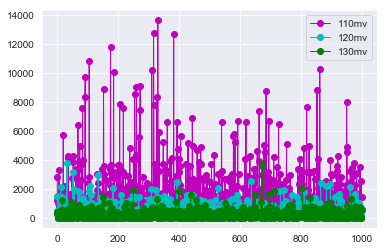

In [431]:
plt.figure()
plt.plot(Exit_m["110mv"],'m-o', label='110mv', linewidth=1)
plt.plot(Exit_m["120mv"],'co-', label='120mv', linewidth=1)
plt.plot(Exit_m["130mv"],'g-o', label='130mv', linewidth=1)
plt.legend()

Text(0.5, 1.0, 'Exit 30,20,10')

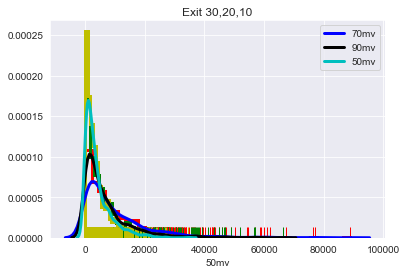

In [118]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.distplot(Exit_m["70mv"],rug=True, rug_kws={"color": "r"}, kde_kws={"color": "b", "lw": 3, "label": "70mv"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
sns.distplot(Exit_m["90mv"],rug=True, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "90mv"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
sns.distplot(Exit_m["50mv"],rug=True, rug_kws={"color": "y"}, kde_kws={"color": "c", "lw": 3, "label": "50mv"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "y"})

plt.title("Exit 30,20,10")

0.0002479940066289773 0.011878868983643166
0.1806581571435868 0.011877048845610342


Text(0, 0.5, 'Frequency')

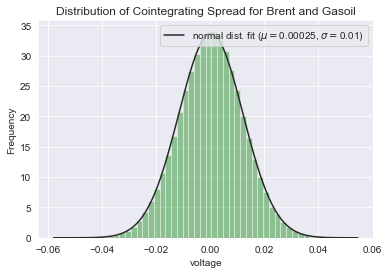

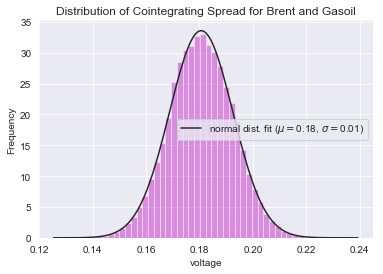

In [98]:
from scipy import stats

ax = sns.distplot(latch1_s["voltage"], color="g", bins=50, kde=False, fit=stats.norm);
plt.title('Distribution of Cointegrating Spread for Brent and Gasoil')

# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(latch1_s["voltage"])
print (mu,sigma)

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')


plt.figure()
ax = sns.distplot(latch2_s["voltage"],  color="m",bins=50,kde=False, fit=stats.norm);
plt.title('Distribution of Cointegrating Spread for Brent and Gasoil')

# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(latch2_s["voltage"])
print (mu,sigma)

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')



(301, 301)


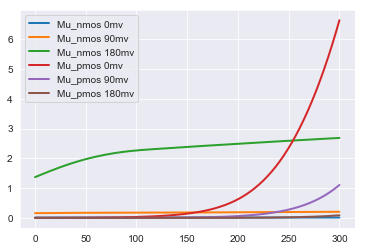

In [146]:
import csv
import numpy as np
data_path = 'Mu_pmos_lvt_p1n1.csv'
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get header from first row
    #headers = next(reader)
    # get all the rows as a list
    Mu_pmos = list(reader)
    # transform data into numpy array
    Mu_pmos = np.array(Mu_pmos).astype(float)
    
    
    
data_path = 'Mu_nmos_lvt_p1n1.csv'
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get header from first row
    #headers = next(reader)
    # get all the rows as a list
    Mu_nmos = list(reader)
    # transform data into numpy array
    Mu_nmos = np.array(Mu_nmos).astype(float)
        
        
data_path = 'Lambda_nmos_lvt_p1n1.csv'
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get header from first row
    #headers = next(reader)
    # get all the rows as a list
    Lambda_nmos = list(reader)
    # transform data into numpy array
    Lambda_nmos = np.array(Lambda_nmos).astype(float)
        
        
data_path = 'Lambda_pmos_lvt_p1n1.csv'
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get header from first row
    #headers = next(reader)
    # get all the rows as a list
    Lambda_pmos = list(reader)
    # transform data into numpy array
    Lambda_pmos = np.array(Lambda_pmos).astype(float)
        
    
print(Mu_nmos.shape)

plt.figure(0)
plt.plot(Mu_nmos[:,61], label='Mu_nmos 0mv', linewidth=2)
plt.plot(Mu_nmos[:,151], label='Mu_nmos 90mv', linewidth=2)
plt.plot(Mu_nmos[:,241], label='Mu_nmos 180mv', linewidth=2)

plt.plot(Mu_pmos[:,61], label='Mu_pmos 0mv', linewidth=2)
plt.plot(Mu_pmos[:,151], label='Mu_pmos 90mv', linewidth=2)
plt.plot(Mu_pmos[:,241], label='Mu_pmos 180mv', linewidth=2)

plt.legend()
#data[0:100,-5]

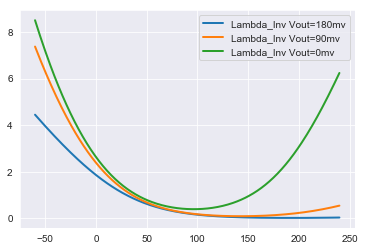

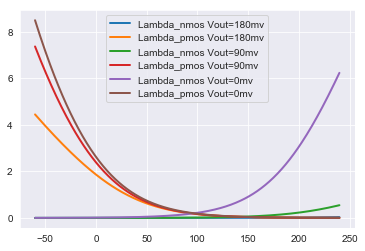

In [157]:
plt.figure()
#plt.plot(list(range(-60, 241)),Lambda_nmos[241,:], label='Lambda_nmos Vout=180mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_pmos[241,:], label='Lambda_pmos Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Lambda_nmos[241,:],Lambda_pmos[241,:]), label='Lambda_Inv Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Lambda_nmos[151,:],Lambda_pmos[151,:]), label='Lambda_Inv Vout=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Lambda_nmos[61,:],Lambda_pmos[61,:]), label='Lambda_Inv Vout=0mv', linewidth=2)
plt.legend()


plt.figure()
plt.plot(list(range(-60, 241)),Lambda_nmos[241,:], label='Lambda_nmos Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),Lambda_pmos[241,:], label='Lambda_pmos Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),Lambda_nmos[151,:], label='Lambda_nmos Vout=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),Lambda_pmos[151,:], label='Lambda_pmos Vout=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),Lambda_nmos[61,:], label='Lambda_nmos Vout=0mv', linewidth=2)
plt.plot(list(range(-60, 241)),Lambda_pmos[61,:], label='Lambda_pmos Vout=0mv', linewidth=2)
plt.legend()

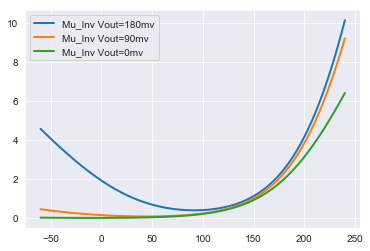

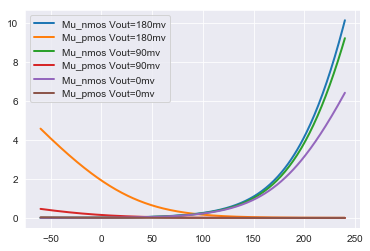

In [158]:
plt.figure()
#plt.plot(list(range(-60, 241)),Lambda_nmos[241,:], label='Lambda_nmos Vout=180mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_pmos[241,:], label='Lambda_pmos Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Mu_nmos[241,:],Mu_pmos[241,:]), label='Mu_Inv Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Mu_nmos[151,:],Mu_pmos[151,:]), label='Mu_Inv Vout=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Mu_nmos[61,:],Mu_pmos[61,:]), label='Mu_Inv Vout=0mv', linewidth=2)
plt.legend()


plt.figure()
plt.plot(list(range(-60, 241)),Mu_nmos[241,:], label='Mu_nmos Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),Mu_pmos[241,:], label='Mu_pmos Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),Mu_nmos[151,:], label='Mu_nmos Vout=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),Mu_pmos[151,:], label='Mu_pmos Vout=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),Mu_nmos[61,:], label='Mu_nmos Vout=0mv', linewidth=2)
plt.plot(list(range(-60, 241)),Mu_pmos[61,:], label='Mu_pmos Vout=0mv', linewidth=2)
plt.legend()

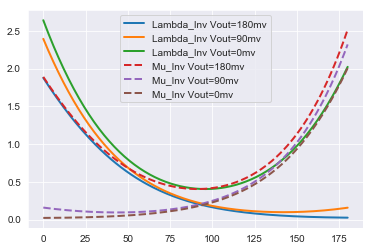

In [164]:
plt.figure()
plt.plot(list(range(0, 181)),np.add(Lambda_nmos[240,60:241],Lambda_pmos[240,60:241]), label='Lambda_Inv Vout=180mv', linewidth=2)
plt.plot(list(range(0, 181)),np.add(Lambda_nmos[150,60:241],Lambda_pmos[150,60:241]), label='Lambda_Inv Vout=90mv', linewidth=2)
plt.plot(list(range(0, 181)),np.add(Lambda_nmos[60,60:241],Lambda_pmos[60,60:241]), label='Lambda_Inv Vout=0mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_nmos[241,:], label='Lambda_nmos Vout=180mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_pmos[241,:], label='Lambda_pmos Vout=180mv', linewidth=2)
plt.plot(list(range(0, 181)),np.add(Mu_nmos[240,60:241],Mu_pmos[240,60:241]),'--', label='Mu_Inv Vout=180mv', linewidth=2)
plt.plot(list(range(0, 181)),np.add(Mu_nmos[150,60:241],Mu_pmos[150,60:241]),'--', label='Mu_Inv Vout=90mv', linewidth=2)
plt.plot(list(range(0, 181)),np.add(Mu_nmos[60,60:241],Mu_pmos[60,60:241]), '--',label='Mu_Inv Vout=0mv', linewidth=2)
plt.legend()


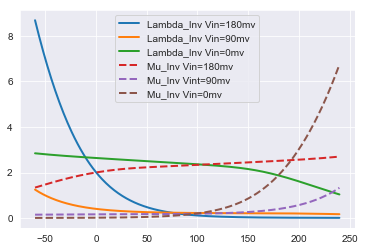

In [166]:
plt.figure()
plt.plot(list(range(-60, 241)),np.add(Lambda_nmos[:,240],Lambda_pmos[:,240]), label='Lambda_Inv Vin=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Lambda_nmos[:,150],Lambda_pmos[:,150]), label='Lambda_Inv Vin=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Lambda_nmos[:,60],Lambda_pmos[:,60]), label='Lambda_Inv Vin=0mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_nmos[241,:], label='Lambda_nmos Vout=180mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_pmos[241,:], label='Lambda_pmos Vout=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Mu_nmos[:,240],Mu_pmos[:,240]),'--', label='Mu_Inv Vin=180mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Mu_nmos[:,150],Mu_pmos[:,150]),'--', label='Mu_Inv Vint=90mv', linewidth=2)
plt.plot(list(range(-60, 241)),np.add(Mu_nmos[:,60],Mu_pmos[:,60]), '--',label='Mu_Inv Vin=0mv', linewidth=2)
plt.legend()


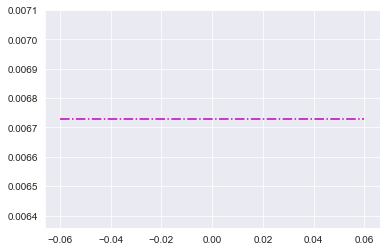

In [88]:
B=1.38064852e-23
T=273.5+120
q=1.60217662e-19
KT=B*T;
Capac=120e-18
noise=math.sqrt(KT/Capac)

plt.hlines(noise, -0.06, 0.06, colors='m', linestyles='dashdot', label='Thermal Noise', data=None)

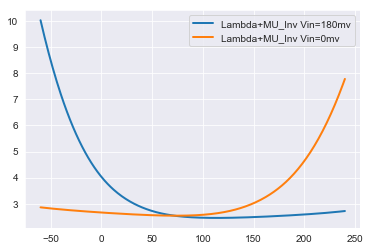

In [168]:
Lambda_Inv_180=np.add(Lambda_nmos[:,240],Lambda_pmos[:,240])
Lambda_Inv_0=np.add(Lambda_nmos[:,60],Lambda_pmos[:,60])

Mu_Inv_180=np.add(Mu_nmos[:,240],Mu_pmos[:,240])
Mu_Inv_0=np.add(Mu_nmos[:,60],Mu_pmos[:,60])

plt.figure()
plt.plot(list(range(-60, 241)),np.add(Lambda_Inv_180,Mu_Inv_180), label='Lambda+MU_Inv Vin=180mv', linewidth=2)

plt.plot(list(range(-60, 241)),np.add(Lambda_Inv_0,Mu_Inv_0), label='Lambda+MU_Inv Vin=0mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_nmos[241,:], label='Lambda_nmos Vout=180mv', linewidth=2)
#plt.plot(list(range(-60, 241)),Lambda_pmos[241,:], label='Lambda_pmos Vout=180mv', linewidth=2)

plt.legend()


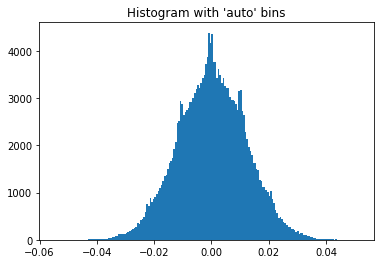

In [24]:
import matplotlib.pyplot as pltt
pltt.hist(data_1["voltage"], bins='auto')  # arguments are passed to np.histogram
pltt.title("Histogram with 'auto' bins")
pltt.show()

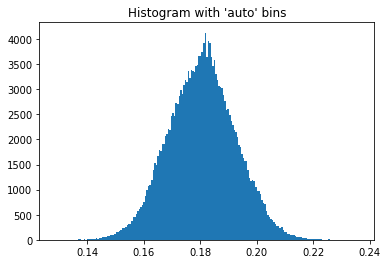

In [25]:
import matplotlib.pyplot as pltt
pltt.hist(data_2["voltage"], bins='auto')  # arguments are passed to np.histogram
pltt.title("Histogram with 'auto' bins")
pltt.show()

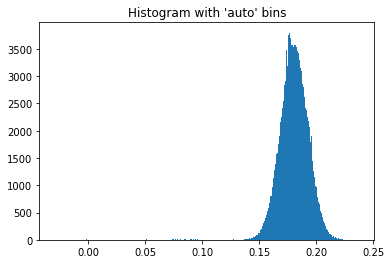

In [26]:
import matplotlib.pyplot as pltt
pltt.hist(data_1m["voltage"], bins='auto')  # arguments are passed to np.histogram
pltt.title("Histogram with 'auto' bins")
pltt.show()

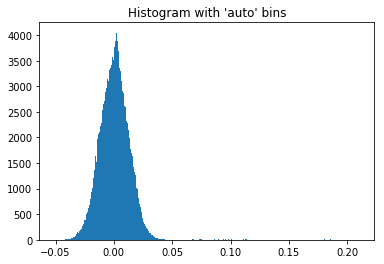

In [27]:
import matplotlib.pyplot as pltt
pltt.hist(data_2m["voltage"], bins='auto')  # arguments are passed to np.histogram
pltt.title("Histogram with 'auto' bins")
pltt.show()

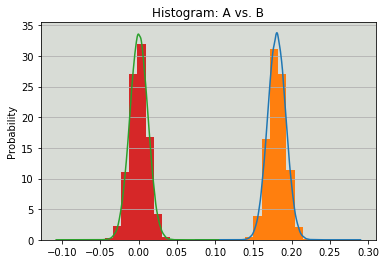

In [34]:
fig, ax = plt.subplots()
data_2["voltage"].plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
data_2["voltage"].plot.hist(density=True, ax=ax)
data_1["voltage"].plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
data_1["voltage"].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

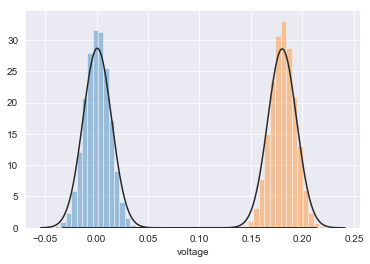

In [41]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.distplot(data_2m["voltage"],fit=stats.norm, kde=False)
sns.distplot(data_1m["voltage"],fit=stats.norm, kde=False)

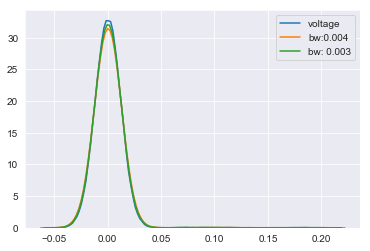

In [45]:
sns.kdeplot(data_2m["voltage"])
sns.kdeplot(data_2m["voltage"], bw=0.0040, label="bw:0.004")
sns.kdeplot(data_2m["voltage"], bw=0.0030, label="bw: 0.003")
plt.legend();

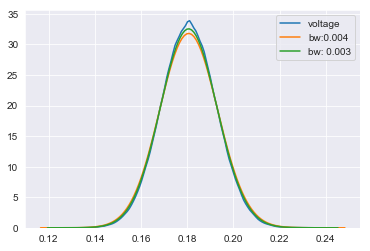

In [46]:
sns.kdeplot(data_2["voltage"])
sns.kdeplot(data_2["voltage"], bw=0.0040, label="bw:0.004")
sns.kdeplot(data_2["voltage"], bw=0.0030, label="bw: 0.003")
plt.legend();